In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/task2-datasett/automobile_data.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt


from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [3]:
df1=pd.read_csv("/kaggle/input/task2-datasett/automobile_data.csv")
df1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [4]:
df1['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# EDA and DATA  VISUALIZATION

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
df1.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Handling '?' in dataset by replacing them with nan so we can impute them later

In [7]:
input_df=df1.drop(['price','symboling'],axis=1)
target_df=df1['price']
input_df

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30
4,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,six,145,idi,3.01,3.4,23.0,106,4800,26,27


In [8]:
marks = input_df.columns[input_df.isin(['?']).any()]
marks

Index(['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower',
       'peak-rpm'],
      dtype='object')

In [9]:
input_df.replace('?', np.nan, inplace=True)
target_df.replace('?',np.nan,inplace=True)
input_df

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30
4,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,six,145,idi,3.01,3.4,23.0,106,4800,26,27


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [11]:
df1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [12]:
df1['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
numerical_columns = input_df.select_dtypes(include=['float64', 'int64']).columns
#input_df = pd.get_dummies(input_df, columns =['make','fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'])
categorical_columns=input_df.loc[:,['make','fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']]
# Create DataFrame for numerical and categorical columns
df_numerical = input_df[numerical_columns]


categorical_columns


,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi
...,...,...,...,...,...,...,...,...
200,volvo,gas,std,sedan,rwd,front,ohc,mpfi
201,volvo,gas,turbo,sedan,rwd,front,ohc,mpfi
202,volvo,gas,std,sedan,rwd,front,ohcv,mpfi
203,volvo,diesel,turbo,sedan,rwd,front,ohc,idi


In [14]:
categorical_columns.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   make             205 non-null    object
 1   fuel-type        205 non-null    object
 2   aspiration       205 non-null    object
 3   body-style       205 non-null    object
 4   drive-wheels     205 non-null    object
 5   engine-location  205 non-null    object
 6   engine-type      205 non-null    object
 7   fuel-system      205 non-null    object
dtypes: object(8)
memory usage: 12.9+ KB


splitting the columns into input data cols and the target cols which well predict

Scaling all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005].

In [15]:
t1=target_df.array.reshape(-1,1)

In [25]:
imputer = SimpleImputer().fit(input_df[['normalized-losses','num-of-doors','bore', 'stroke', 'horsepower',
       'peak-rpm']])
input_df[['normalized-losses','num-of-doors', 'bore', 'stroke', 'horsepower',
       'peak-rpm']] = imputer.transform(input_df[['normalized-losses','num-of-doors', 'bore', 'stroke', 'horsepower',
       'peak-rpm']])
imputer1=SimpleImputer().fit(t1)
t1=imputer1.transform(pd.DataFrame(t1))

In [17]:
scaler = MinMaxScaler().fit(input_df[numerical_columns])
input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])
input_df[numerical_columns]


,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.12500,0.222222,0.289474
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.12500,0.222222,0.289474
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.12500,0.166667,0.263158
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.18750,0.305556,0.368421
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.06250,0.138889,0.157895
...,...,...,...,...,...,...,...,...,...
200,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.15625,0.277778,0.315789
201,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.10625,0.166667,0.236842
202,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.11250,0.138889,0.184211
203,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,1.00000,0.361111,0.289474


Categorical encoding

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [19]:
input_df['num-of-doors'].replace({'two':2, 'four':4}, inplace=True)
input_df['num-of-cylinders'].replace({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}, inplace=True)

In [20]:
input_df

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,0.058309,0.413433,...,4,0.260377,mpfi,3.47,2.68,0.12500,111,5000,0.222222,0.289474
1,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,0.058309,0.413433,...,4,0.260377,mpfi,3.47,2.68,0.12500,111,5000,0.222222,0.289474
2,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,0.230321,0.449254,...,6,0.343396,mpfi,2.68,3.47,0.12500,154,5000,0.166667,0.263158
3,164,audi,gas,std,4.0,sedan,fwd,front,0.384840,0.529851,...,4,0.181132,mpfi,3.19,3.4,0.18750,102,5500,0.305556,0.368421
4,164,audi,gas,std,4.0,sedan,4wd,front,0.373178,0.529851,...,5,0.283019,mpfi,3.19,3.4,0.06250,115,5500,0.138889,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,volvo,gas,std,4.0,sedan,rwd,front,0.655977,0.711940,...,4,0.301887,mpfi,3.78,3.15,0.15625,114,5400,0.277778,0.315789
201,95,volvo,gas,turbo,4.0,sedan,rwd,front,0.655977,0.711940,...,4,0.301887,mpfi,3.78,3.15,0.10625,160,5300,0.166667,0.236842
202,95,volvo,gas,std,4.0,sedan,rwd,front,0.655977,0.711940,...,6,0.422642,mpfi,3.58,2.87,0.11250,134,5500,0.138889,0.184211
203,95,volvo,diesel,turbo,4.0,sedan,rwd,front,0.655977,0.711940,...,6,0.316981,idi,3.01,3.4,1.00000,106,4800,0.361111,0.289474


car_names = input_df['make'].tolist()
unique_names = []
for car in car_names:
    unique_names.append(car)

unique_names = set(unique_names)
for i, c in enumerate(input_df["make"]):
    for u in unique_names:
        if u in c:
            input_df['make'].iloc[i] = u
input_df = pd.get_dummies(input_df, columns = ['make'])
input_df.head()


In [26]:
df_encoded = pd.get_dummies(input_df, columns=['make','fuel-type', 'aspiration', 'body-style', 
                                         'drive-wheels', 'engine-location', 'engine-type', 
                                         'fuel-system'])

# Display the first few rows of the encoded dataframe
df_encoded = df_encoded.astype(int)
df_encoded.head()



,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,122,2,0,0,0,0,0,4,0,3,...,0,0,0,0,0,0,0,1,0,0
1,122,2,0,0,0,0,0,4,0,3,...,0,0,0,0,0,0,0,1,0,0
2,122,2,0,0,0,0,0,6,0,2,...,1,0,0,0,0,0,0,1,0,0
3,164,4,0,0,0,0,0,4,0,3,...,0,0,0,0,0,0,0,1,0,0
4,164,4,0,0,0,0,0,5,0,3,...,0,0,0,0,0,0,0,1,0,0


In [27]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   normalized-losses       205 non-null    int64
 1   num-of-doors            205 non-null    int64
 2   wheel-base              205 non-null    int64
 3   length                  205 non-null    int64
 4   width                   205 non-null    int64
 5   height                  205 non-null    int64
 6   curb-weight             205 non-null    int64
 7   num-of-cylinders        205 non-null    int64
 8   engine-size             205 non-null    int64
 9   bore                    205 non-null    int64
 10  stroke                  205 non-null    int64
 11  compression-ratio       205 non-null    int64
 12  horsepower              205 non-null    int64
 13  peak-rpm                205 non-null    int64
 14  city-mpg                205 non-null    int64
 15  highway-mpg            

In [28]:
input_df

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,0.058309,0.413433,...,4,0.260377,mpfi,3.47,2.68,0.12500,111.0,5000.0,0.222222,0.289474
1,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,0.058309,0.413433,...,4,0.260377,mpfi,3.47,2.68,0.12500,111.0,5000.0,0.222222,0.289474
2,122.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,0.230321,0.449254,...,6,0.343396,mpfi,2.68,3.47,0.12500,154.0,5000.0,0.166667,0.263158
3,164.0,audi,gas,std,4.0,sedan,fwd,front,0.384840,0.529851,...,4,0.181132,mpfi,3.19,3.40,0.18750,102.0,5500.0,0.305556,0.368421
4,164.0,audi,gas,std,4.0,sedan,4wd,front,0.373178,0.529851,...,5,0.283019,mpfi,3.19,3.40,0.06250,115.0,5500.0,0.138889,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,volvo,gas,std,4.0,sedan,rwd,front,0.655977,0.711940,...,4,0.301887,mpfi,3.78,3.15,0.15625,114.0,5400.0,0.277778,0.315789
201,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,0.655977,0.711940,...,4,0.301887,mpfi,3.78,3.15,0.10625,160.0,5300.0,0.166667,0.236842
202,95.0,volvo,gas,std,4.0,sedan,rwd,front,0.655977,0.711940,...,6,0.422642,mpfi,3.58,2.87,0.11250,134.0,5500.0,0.138889,0.184211
203,95.0,volvo,diesel,turbo,4.0,sedan,rwd,front,0.655977,0.711940,...,6,0.316981,idi,3.01,3.40,1.00000,106.0,4800.0,0.361111,0.289474


<Axes: >

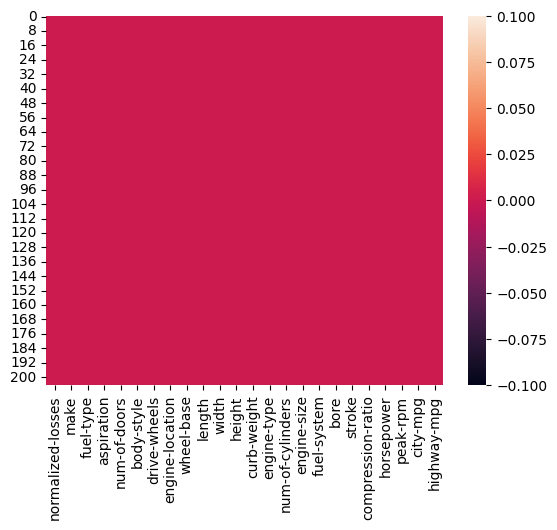

In [29]:
sns.heatmap(input_df.isnull())

In [30]:
input_df.isnull().sum()

normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
dtype: int64

no missing values

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>],
       [<Axes: title={'center': 'engine-size'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'city-mpg'}>],
       [<Axes: title={'center': 'highway-mpg'}>, <Axes: >, <Axes: >]],
      dtype=object)

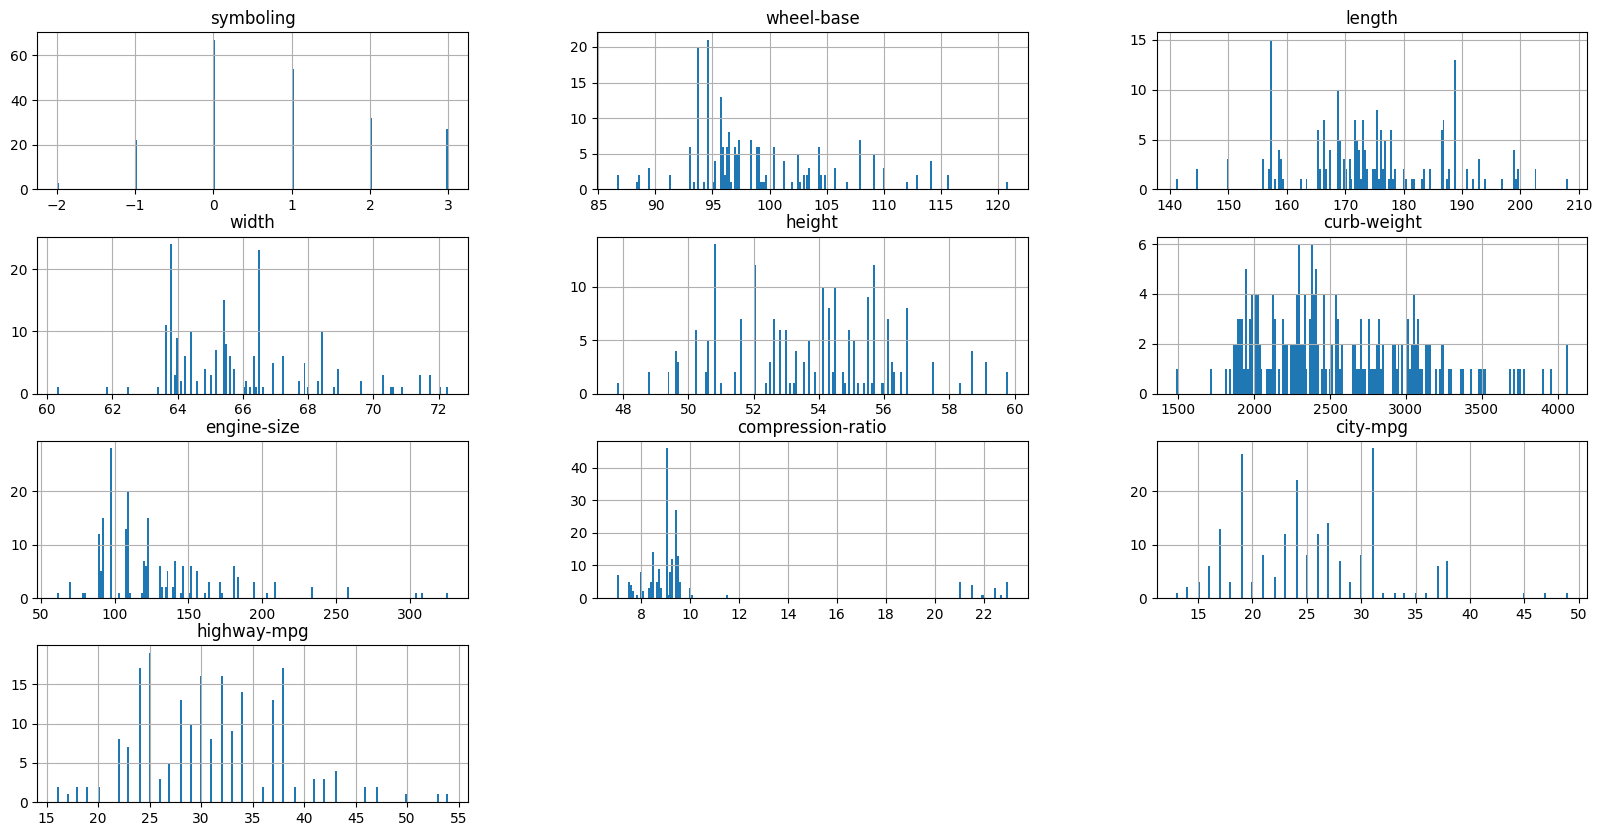

In [31]:
df1.hist(bins=200,figsize=[20,10])

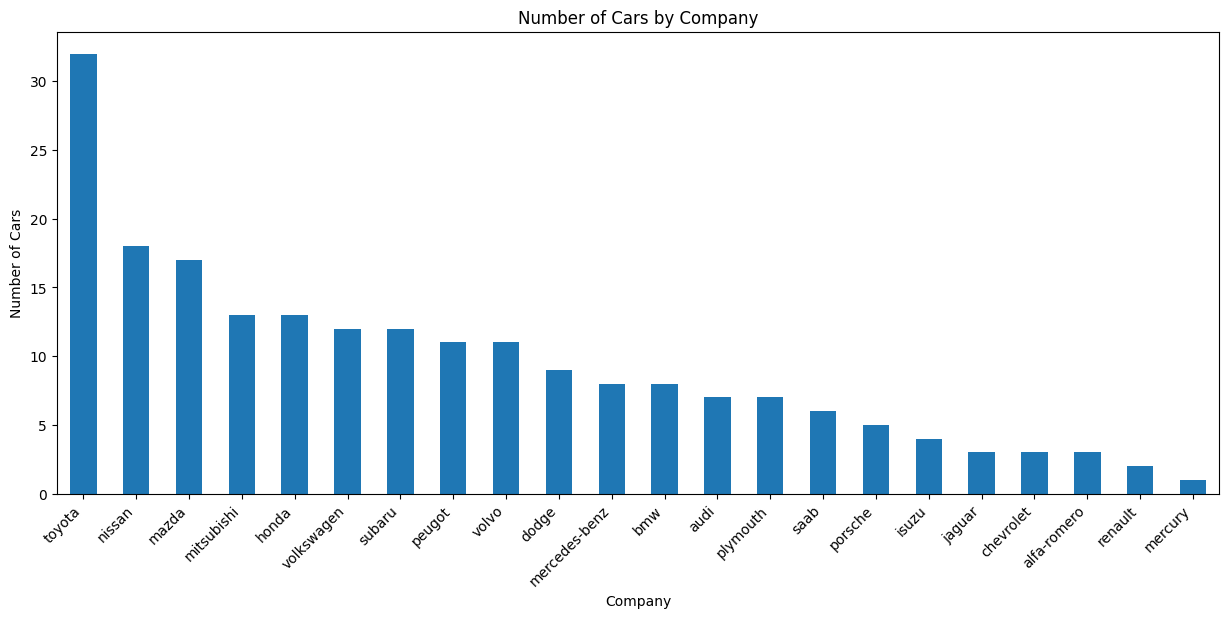

In [32]:

plt.figure(figsize=(15, 6))

# making bar plot of value count of cars by company
df1['make'].value_counts().plot(kind='bar')
# adding title and x and y axis labels
plt.title('Number of Cars by Company')
plt.xlabel('Company')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')
plt.show()

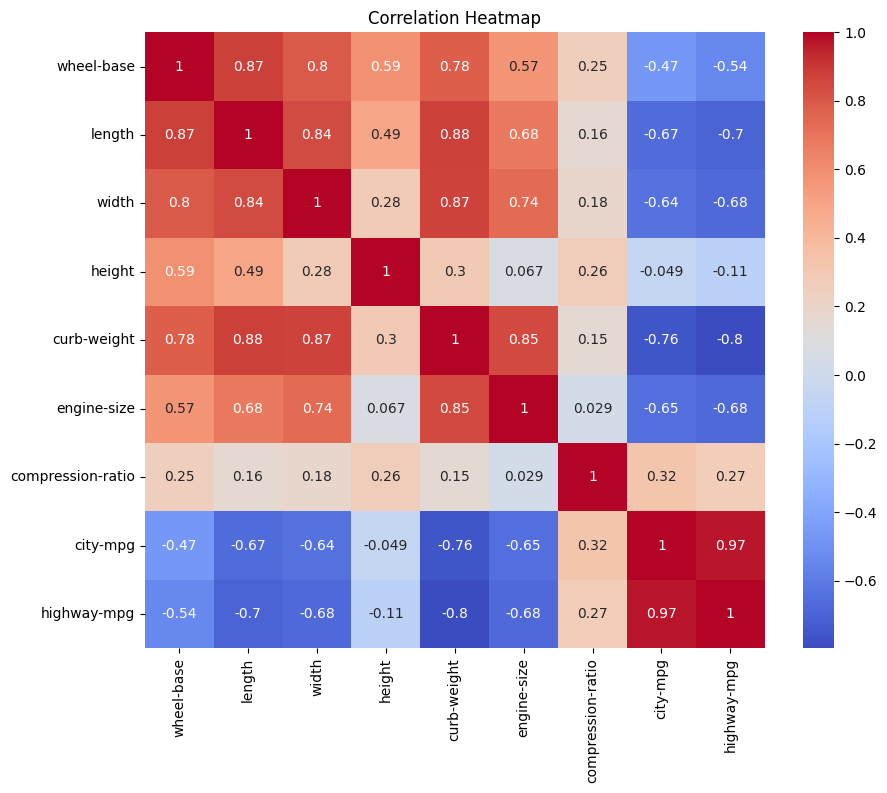

In [33]:
correlation_matrix = input_df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Principal Component Analysis

it uses linear projections of data to reduce their dimensions,while attempting to maximize the variance of data in the projection

For example, one could have an n-dimensional dataset, having n features, and reduce the dataset all the way down to 1-dimension by creating a feature consisting of just the first principal component. However, when it comes to making predictions one still need access to all of the original features so as to re-create the same principal component(s) to feed into the trained model. So, although PCA reduces the number of dimensions, it is not to be considered a feature elimination technique. It should be mentioned that PCA has notable limitations; the feature-mixtures in the components created by PCA become uninterpretable

In [34]:
input_df[['normalized-losses','bore', 'stroke', 'horsepower',
       'peak-rpm']].shape

(205, 5)

In [35]:
input_df

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,0.058309,0.413433,...,4,0.260377,mpfi,3.47,2.68,0.12500,111.0,5000.0,0.222222,0.289474
1,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,0.058309,0.413433,...,4,0.260377,mpfi,3.47,2.68,0.12500,111.0,5000.0,0.222222,0.289474
2,122.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,0.230321,0.449254,...,6,0.343396,mpfi,2.68,3.47,0.12500,154.0,5000.0,0.166667,0.263158
3,164.0,audi,gas,std,4.0,sedan,fwd,front,0.384840,0.529851,...,4,0.181132,mpfi,3.19,3.40,0.18750,102.0,5500.0,0.305556,0.368421
4,164.0,audi,gas,std,4.0,sedan,4wd,front,0.373178,0.529851,...,5,0.283019,mpfi,3.19,3.40,0.06250,115.0,5500.0,0.138889,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,volvo,gas,std,4.0,sedan,rwd,front,0.655977,0.711940,...,4,0.301887,mpfi,3.78,3.15,0.15625,114.0,5400.0,0.277778,0.315789
201,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,0.655977,0.711940,...,4,0.301887,mpfi,3.78,3.15,0.10625,160.0,5300.0,0.166667,0.236842
202,95.0,volvo,gas,std,4.0,sedan,rwd,front,0.655977,0.711940,...,6,0.422642,mpfi,3.58,2.87,0.11250,134.0,5500.0,0.138889,0.184211
203,95.0,volvo,diesel,turbo,4.0,sedan,rwd,front,0.655977,0.711940,...,6,0.316981,idi,3.01,3.40,1.00000,106.0,4800.0,0.361111,0.289474


In [58]:
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(df_encoded)

In [59]:
print("Number of original features is {} and of reduced features is {}".format(df_encoded.shape[1], x_reduced.shape[1]))

Number of original features is 67 and of reduced features is 2


# Train-Test split and model training

In [60]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(input_df, t1, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(x_reduced,t1, test_size=0.2, random_state=42)

# modeling

In [61]:
clean_eval=dict()
reduced_eval=dict()
def evaluate_regression(evals, model, name, X_train, X_test, y_train, y_test):
    train_MSE = mean_squared_error(y_train, model.predict(X_train), squared=False)
    test_MSE = mean_squared_error(y_test, model.predict(X_test), squared=False)
    train_MAE=mean_absolute_error(y_train,model.predict(X_train))
    test_MAE=mean_absolute_error(y_test, model.predict(X_test))
    r2_train = r2_score(y_train, model.predict(X_train))
    r2_test = r2_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_MSE, test_MSE,train_MAE,test_MAE, r2_train, r2_test]
    print(" train MSE " + str(name) + " {}  Test MSE ".format(train_MSE) + str(name) + " {}".format(test_MSE))
    print(" train MAE " + str(name) + " {}  Test MAE ".format(train_MAE) + str(name) + " {}".format(test_MAE))
    print("R2 score for " + str(name) + " training is {} ".format(r2_train*100) + " and for test is {}".format(r2_test*100))

In [62]:
model1=LinearRegression().fit(X_train_r,y_train_r)
evaluate_regression(reduced_eval,model1,'linear reg',X_train_r, X_test_r, y_train_r, y_test_r)


 train MSE linear reg 4850.238919059806  Test MSE linear reg 5741.548642074914
 train MAE linear reg 3268.5260510217026  Test MAE linear reg 3927.493591891616
R2 score for linear reg training is 59.08931863293223  and for test is 57.72155541513132


'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs

In [43]:
rlr = Ridge(alpha=0.9).fit(X_train_r, y_train_r)
evaluate_regression(reduced_eval,rlr, "Ridge Regression", X_train_r, X_test_r, y_train_r, y_test_r)

 train MSE Ridge Regression 4850.238919096257  Test MSE Ridge Regression 5741.554120300633
 train MAE Ridge Regression 3268.5270726407975  Test MAE Ridge Regression 3927.4944317850154
R2 score for Ridge Regression training is 59.08931863231732  and for test is 57.7214747362109


In [44]:
reduced_las = LinearRegression().fit(X_train_r, y_train_r)
evaluate_regression(reduced_eval,reduced_las, "Reduced Lasso Regression", X_train_r, X_test_r, y_train_r, y_test_r)

 train MSE Reduced Lasso Regression 4850.238919059806  Test MSE Reduced Lasso Regression 5741.548642074914
 train MAE Reduced Lasso Regression 3268.5260510217026  Test MAE Reduced Lasso Regression 3927.493591891616
R2 score for Reduced Lasso Regression training is 59.08931863293223  and for test is 57.72155541513132


In [45]:
from sklearn.ensemble import RandomForestRegressor
r3=RandomForestRegressor(n_estimators=400).fit(X_train_r,y_train_r)


In [46]:
evaluate_regression(clean_eval,r3,'RandomForest',X_train_r, X_test_r, y_train_r, y_test_r)

 train MSE RandomForest 1705.4844890446104  Test MSE RandomForest 2980.0543755625445
 train MAE RandomForest 1136.9929756165272  Test MAE RandomForest 2011.5258149323085
R2 score for RandomForest training is 94.94168353954832  and for test is 88.61037877532762


In [47]:
def plot_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
    plt.figure(figsize=(10,6))
    plt.plot(df[:20])
    plt.legend(['Actual' , 'Predicted'])

In [66]:
import pickle
with open('rlr.pkl', 'wb') as model_file:
    pickle.dump(rlr, model_file)

with open('pca.pkl', 'wb') as pca_file:
    pickle.dump(pca, pca_file)


In [ ]:
# streamlit_app.py

import streamlit as st
import pickle
import numpy as np
import pandas as pd

# Load saved PCA and model using pickle
with open('rlr.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('pca.pkl', 'rb') as pca_file:
    pca = pickle.load(pca_file)

# Streamlit app
st.title('PCA-based Model Deployment')

# Input data from user (you can adjust this based on the original features of your dataset)
st.write('Input the original feature values:')
user_input = []
for i in range(67): 
    user_input.append(st.number_input(f'Feature {i+1}', min_value=-10.0, max_value=10.0, step=0.1))

# Convert the user input into a numpy array and reshape it
user_input = np.array(user_input).reshape(1, -1)

# Apply PCA to the user input
user_input_pca = pca.transform(user_input)

# Make predictions with the model
if st.button('Predict'):
    prediction = model.predict(user_input_pca)
    st.write(f'The predicted class is: {prediction[0]}')
